In [ ]:
import os
import sys

# Set HOME directory
HOME = os.getcwd()
print("HOME:", HOME)

# Define repository details
grounding_dino_repo = "GroundingDINO"
grounding_dino_url = "https://github.com/IDEA-Research/GroundingDINO.git"
segment_anything_repo = "segment-anything"
segment_anything_url = "git+https://github.com/facebookresearch/segment-anything.git"

# Clone GroundingDINO repository if not already cloned
os.chdir(HOME)
if not os.path.exists(grounding_dino_repo):
    os.system("git config --global http.postBuffer 157286400")  # Set Git buffer size
    os.system(f"git clone {grounding_dino_url}")
else:
    print(f"{grounding_dino_repo} repository already cloned.")

# Install GroundingDINO requirements
grounding_dino_path = os.path.join(HOME, grounding_dino_repo)
if os.path.exists(grounding_dino_path):
    os.chdir(grounding_dino_path)
    os.system("git checkout -q 57535c5a79791cb76e36fdb64975271354f10251")
    os.system(f"{sys.executable} -m pip install -e .")

# Install Segment Anything if not already installed
os.chdir(HOME)
if not os.path.exists(segment_anything_repo):  # Just a logical check; replace if needed
    os.system(f"{sys.executable} -m pip install {segment_anything_url}")
else:
    print(f"{segment_anything_repo} already installed or cloned."
          )

HOME: e:\image_type_3_dummy_removal\GroundingDINO
GroundingDINO repository already cloned.


In [ ]:
import os
import urllib.request
import subprocess

# Function to check if a package is installed with a specific version
def is_package_installed(package_name, version):
    try:
        import pkg_resources
        pkg_resources.require(f"{package_name}=={version}")
        return True
    except (ImportError, pkg_resources.DistributionNotFound, pkg_resources.VersionConflict):
        return False

# Set HOME directory
HOME = os.getcwd()
print("HOME Directory:", HOME)

# Ensure supervision is installed at the required version
required_supervision_version = "0.6.0"
if not is_package_installed("supervision", required_supervision_version):
    print(f"Installing supervision=={required_supervision_version}...")
    subprocess.run(["pip", "uninstall", "-y", "supervision"], check=True)
    subprocess.run(["pip", "install", f"supervision=={required_supervision_version}"], check=True)
else:
    print(f"supervision=={required_supervision_version} is already installed.")

# Verify supervision version
import supervision as sv
print("Supervision version:", sv.__version__)

# Paths
GROUNDING_DINO_CONFIG_PATH = os.path.normpath(
    os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
)
print("Expected Config Path:", GROUNDING_DINO_CONFIG_PATH)

# Debugging: Check files in the directory
config_dir = os.path.normpath(os.path.join(HOME, "GroundingDINO/groundingdino/config"))
if os.path.isdir(config_dir):
    print("Files in Config Directory:", os.listdir(config_dir))
else:
    print("Config directory does not exist:", config_dir)

# Check if file exists
file_exists = os.path.isfile(GROUNDING_DINO_CONFIG_PATH)
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", file_exists)

# Weights directory
weights_dir = os.path.join(HOME, "weights")
os.makedirs(weights_dir, exist_ok=True)

# Grounding DINO Weights
dino_url = "https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth"
dino_path = os.path.join(weights_dir, "groundingdino_swint_ogc.pth")
if not os.path.isfile(dino_path):
    print(f"Downloading Grounding DINO weights to {dino_path}...")
    urllib.request.urlretrieve(dino_url, dino_path)
else:
    print(f"Grounding DINO weights already exist at {dino_path}.")

# SAM Weights
sam_url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
sam_path = os.path.join(weights_dir, "sam_vit_h_4b8939.pth")
if not os.path.isfile(sam_path):
    print(f"Downloading SAM weights to {sam_path}...")
    urllib.request.urlretrieve(sam_url, sam_path)
else:
    print(f"SAM weights already exist at {sam_path}.")


HOME Directory: e:\image_type_3_dummy_removal


C:\Users\hp\AppData\Local\Temp\ipykernel_17916\3747843512.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


supervision==0.6.0 is already installed.
Supervision version: 0.6.0
Expected Config Path: e:\image_type_3_dummy_removal\GroundingDINO\groundingdino\config\GroundingDINO_SwinT_OGC.py
Files in Config Directory: ['GroundingDINO_SwinB.cfg.py', 'GroundingDINO_SwinT_OGC.py']
e:\image_type_3_dummy_removal\GroundingDINO\groundingdino\config\GroundingDINO_SwinT_OGC.py ; exist: True
Grounding DINO weights already exist at e:\image_type_3_dummy_removal\weights\groundingdino_swint_ogc.pth.


In [ ]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Load GroundingDino model.
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

ModuleNotFoundError: No module named 'torch'

In [4]:
#Load SAM Model.
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry["vit_h"](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [5]:
import numpy as np
from segment_anything import SamPredictor
# Detection with Grounding DINO

# def detect_objects_with_DINO(SOURCE_IMAGE_PATH,CLASSES,BOX_TRESHOLD,TEXT_TRESHOLD):
#   # load image
#   image = cv2.imread(SOURCE_IMAGE_PATH)

#   # detect objects
#   detections = grounding_dino_model.predict_with_classes(
#       image=image,
#       classes=enhance_class_name(class_names=CLASSES),
#       box_threshold=BOX_TRESHOLD,
#       text_threshold=TEXT_TRESHOLD
#   )

#   #return found detections.
#   return detections

  #Segment the Detections with SAM and return Masks.
def segment_and_getmasks(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

Ensuring output directories are set up.
Model loaded successfully!
Processing image: /content/testing/1170457391095_3.jpg
Preprocessing image...


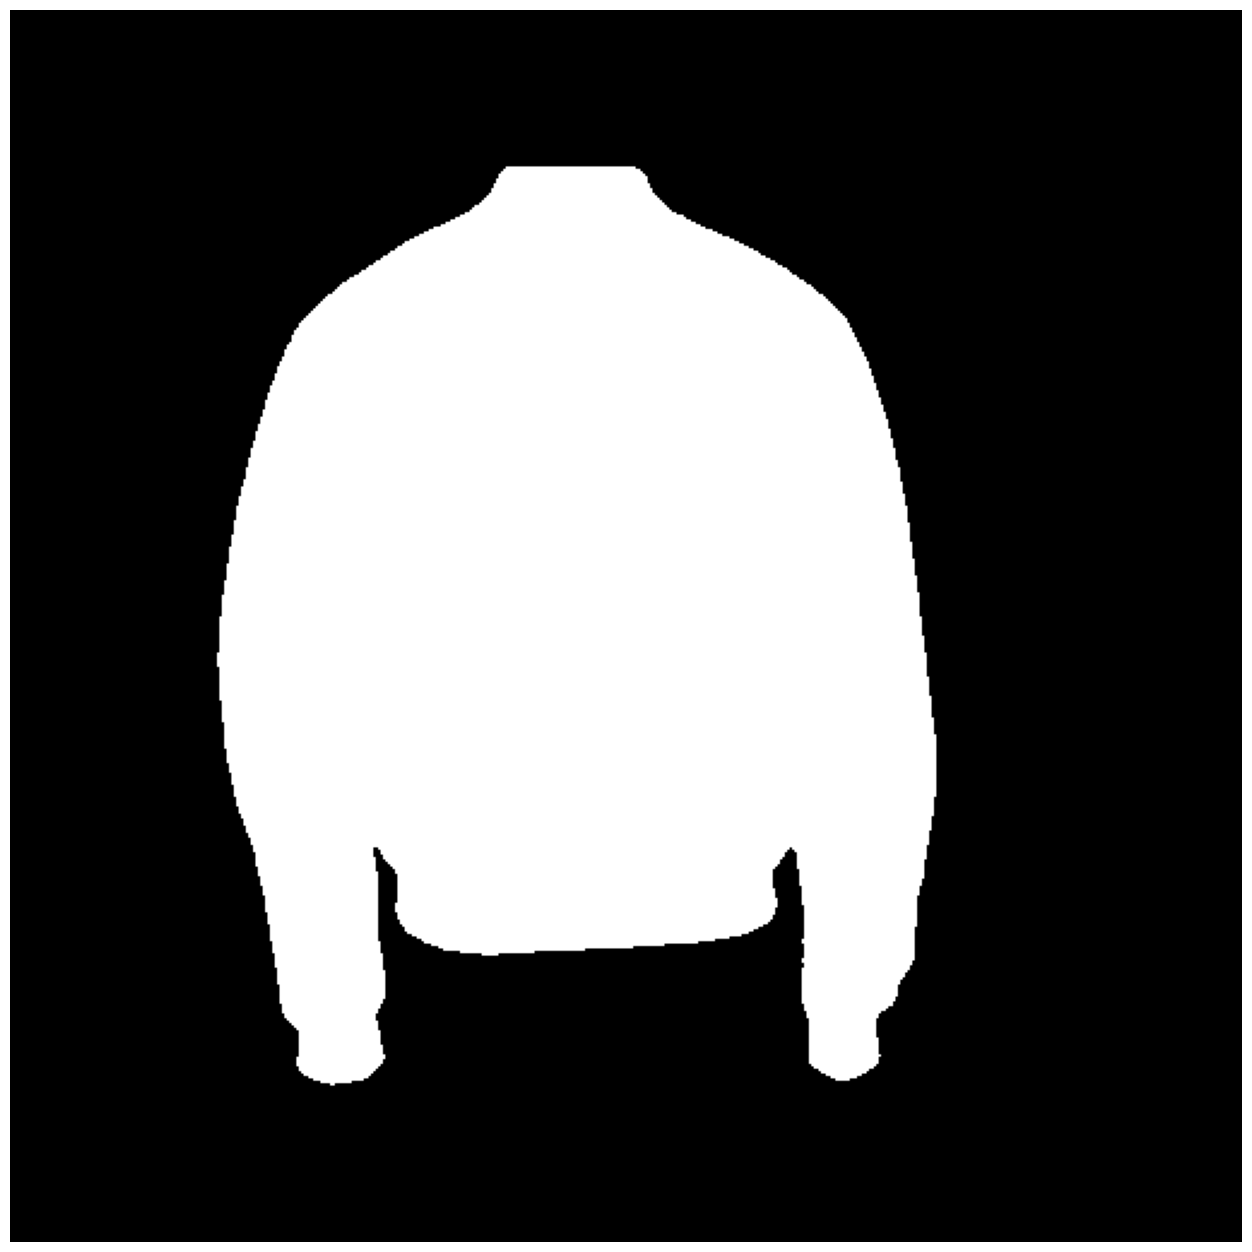

Resized image saved to: /content/resized_images/resized_1170457391095_3.jpg
Mask saved to: /content/masks/mask_1170457391095_3.jpg
Applying inverse mask on: /content/resized_images/resized_1170457391095_3.jpg
Processed image saved to: /content/output_images/output_resized_1170457391095_3.jpg
Processing image: /content/testing/3665767118787_1.jpg
Preprocessing image...


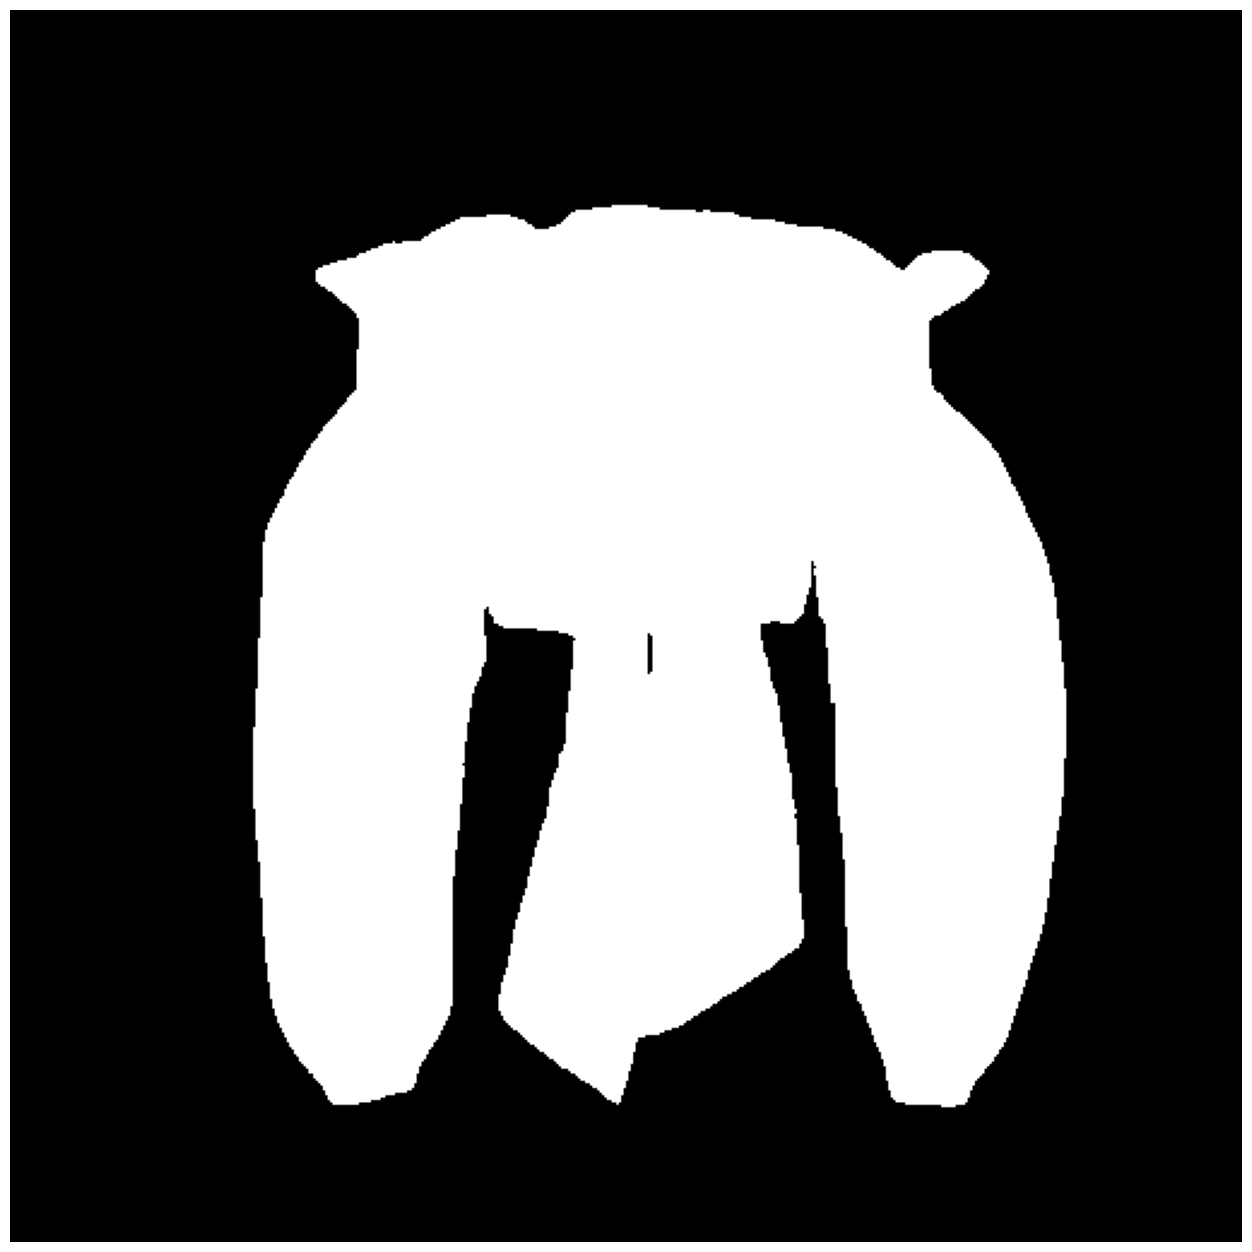

Resized image saved to: /content/resized_images/resized_3665767118787_1.jpg
Mask saved to: /content/masks/mask_3665767118787_1.jpg
Applying inverse mask on: /content/resized_images/resized_3665767118787_1.jpg
Processed image saved to: /content/output_images/output_resized_3665767118787_1.jpg
Processing image: /content/testing/3613616131760_1.jpg
Preprocessing image...


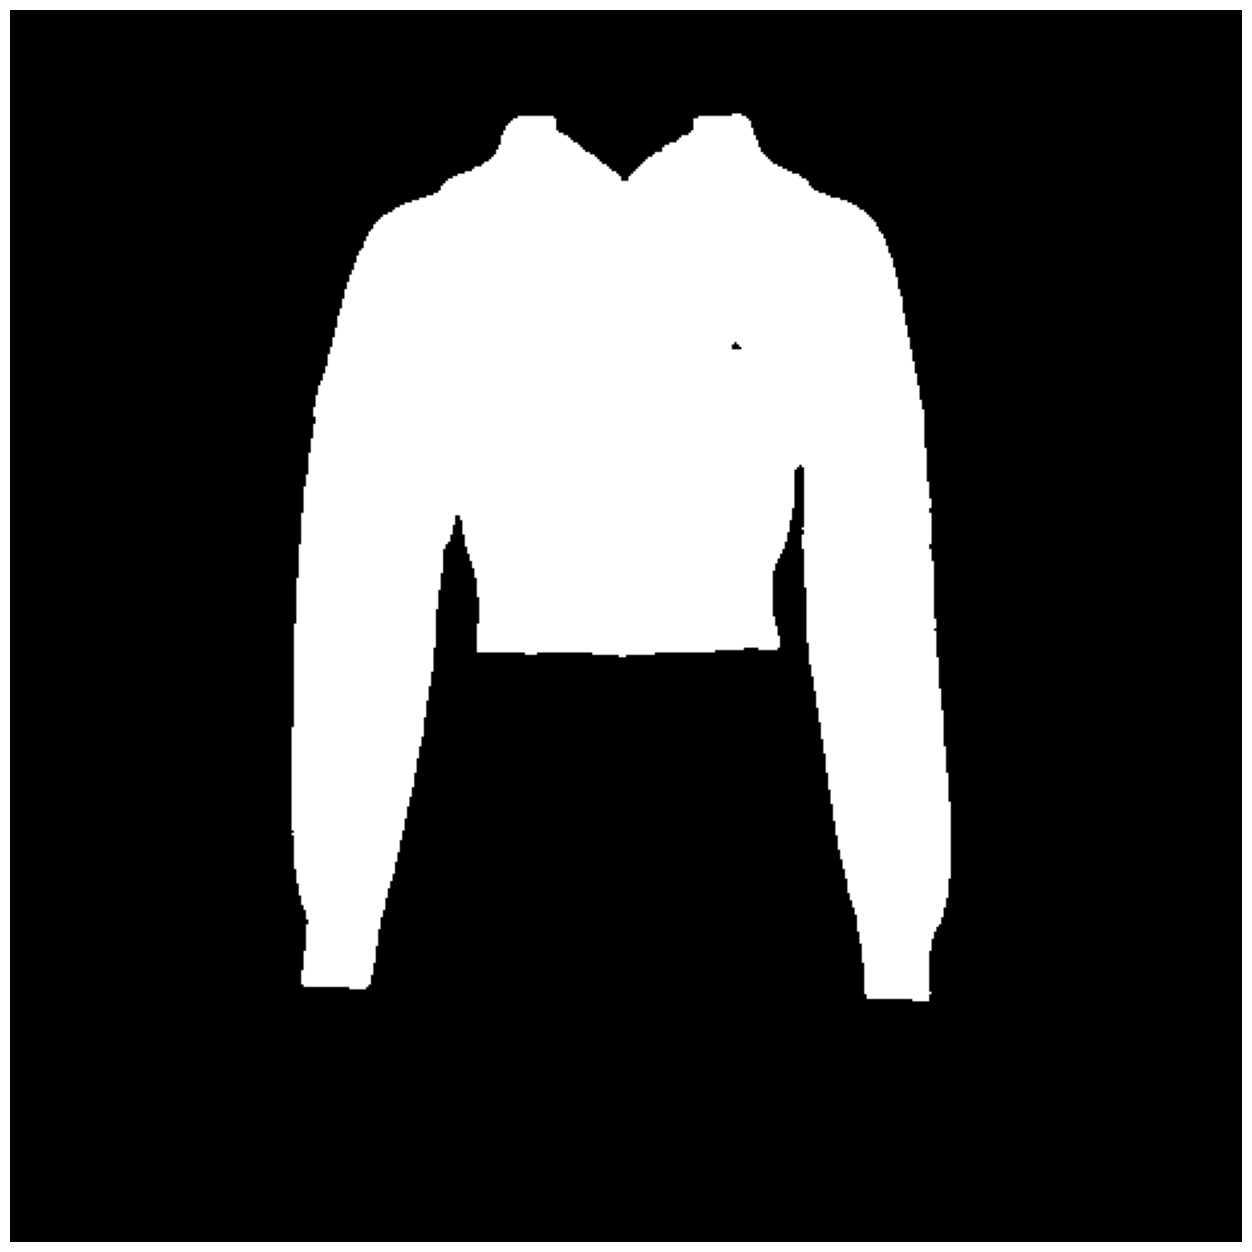

Resized image saved to: /content/resized_images/resized_3613616131760_1.jpg
Mask saved to: /content/masks/mask_3613616131760_1.jpg
Applying inverse mask on: /content/resized_images/resized_3613616131760_1.jpg
Processed image saved to: /content/output_images/output_resized_3613616131760_1.jpg


In [13]:
import os
import cv2
import numpy as np
from typing import List
from segment_anything import SamPredictor
import supervision as sv

class ImprovedMannequinRemover:
    def __init__(self):
        print("Model loaded successfully!")

    def ensure_directory_exists(self, folder_path):
        """Ensure that the directory exists, create if not."""
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

    def resize_image(self, image, target_size=512):
        """Resize image maintaining aspect ratio"""
        h, w = image.shape[:2]
        aspect = w / h

        if h > w:
            new_h = target_size
            new_w = int(target_size * aspect)
        else:
            new_w = target_size
            new_h = int(target_size / aspect)

        return cv2.resize(image, (new_w, new_h))

    def pad_image(self, image, target_size=512):
        h, w = image.shape[:2]
        top = (target_size - h) // 2
        bottom = target_size - h - top
        left = (target_size - w) // 2
        right = target_size - w - left

        return cv2.copyMakeBorder(image, top, bottom, left, right,
                                  cv2.BORDER_CONSTANT, value=[255, 255, 255])

        #enchancing classes names.
    def enhance_class_name(self, class_names: List[str]) -> List[str]:
        return [
            f"all {class_name}s"
            for class_name
            in class_names
        ]

    def create_refined_mask(self, image):
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

        lower_white1 = np.array([0, 0, 200])
        upper_white1 = np.array([180, 30, 255])
        mask1 = cv2.inRange(hsv, lower_white1, upper_white1)

        lower_white2 = np.array([0, 0, 130])
        upper_white2 = np.array([180, 40, 255])
        mask2 = cv2.inRange(hsv, lower_white2, upper_white2)

        combined_mask = cv2.bitwise_or(mask1, mask2)

        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

        return mask

    def process_image(self, input_path, resized_folder, masks_folder, GDINO, SAM_PREDICTOR):
      try:
            print(f"Processing image: {input_path}")
            original_image = cv2.imread(input_path)
            if original_image is None:
                raise ValueError(f"Could not read image at {input_path}")

            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

            print("Preprocessing image...")
            resized_image = self.resize_image(original_image)
            padded_image = self.pad_image(resized_image)

            # Load Padded image with GDINO.
            detections = GDINO.predict_with_classes(
                image=padded_image,
                classes=self.enhance_class_name(["cloth"]),
                box_threshold=0.35,
                text_threshold=0.25
            )

            # Generate Masks with SAM. convert detections to masks
            detections.mask = segment_and_getmasks(
                sam_predictor=SAM_PREDICTOR,  # Changed from sam_predictor to SAM_PREDICTOR
                image=cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB),
                xyxy=detections.xyxy
            )

            sv.plot_image(detections.mask[0], (16, 16))

            # Ensure output directories exist
            self.ensure_directory_exists(resized_folder)
            self.ensure_directory_exists(masks_folder)

            # Save resized image
            image_filename = os.path.basename(input_path)
            resized_image_path = os.path.join(resized_folder, f"resized_{image_filename}")
            padded_image = cv2.cvtColor(padded_image, cv2.COLOR_RGB2BGR)
            cv2.imwrite(resized_image_path, padded_image)

            print(f"Resized image saved to: {resized_image_path}")

            # Save mask
            mask_image_path = os.path.join(masks_folder, f"mask_{image_filename}")
            cv2.imwrite(mask_image_path, detections.mask[0] * 255)  # Multiply by 255 to convert to 8-bit

            print(f"Mask saved to: {mask_image_path}")

            return resized_image_path, mask_image_path

      except Exception as e:
          print(f"Error: {str(e)}")
          raise


def expand_mask(mask, expansion_pixels=10):
    kernel = np.ones((expansion_pixels - 60, expansion_pixels - 60), np.uint8)
    expanded_mask = cv2.dilate(mask, kernel, iterations=1)
    return expanded_mask

def apply_inverse_mask(image_path, mask_path, output_folder):
    print(f"Applying inverse mask on: {image_path}")

    # Ensure output directory exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

    if image.shape[:2] != mask.shape[:2]:
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    mask_inv = cv2.bitwise_not(mask)
    expanded_mask = expand_mask(mask_inv, 60)

    white_background = np.ones_like(image) * 255
    result = np.where(expanded_mask[:, :, None] == 0, image, white_background)

    final_output_path = os.path.join(output_folder, f"output_{os.path.basename(image_path)}")
    cv2.imwrite(final_output_path, result)

    print(f"Processed image saved to: {final_output_path}")

def process_folder(input_folder, resized_folder, masks_folder, output_folder):

    if not os.path.exists(input_folder):
        raise ValueError(f"Input folder does not exist: {input_folder}")

    print(f"Ensuring output directories are set up.")
    if not os.path.exists(resized_folder):
        os.makedirs(resized_folder)
    if not os.path.exists(masks_folder):
        os.makedirs(masks_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    remover = ImprovedMannequinRemover()

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)

            # Process image and create mask
            resized_image_path, mask_image_path = remover.process_image(input_path, resized_folder, masks_folder, grounding_dino_model, sam_predictor)

            # Apply inverse mask
            apply_inverse_mask(resized_image_path, mask_image_path, output_folder)

def main():
    # Define folder paths
    input_folder = "/content/testing"
    resized_folder = "/content/resized_images"
    masks_folder = "/content/masks"
    output_folder = "/content/output_images"

    process_folder(input_folder, resized_folder, masks_folder, output_folder)


if __name__ == "__main__":
    main()


In [ ]:
xx`